<a href="https://colab.research.google.com/github/LakshyaBundela/rock-and-mine-classificatio/blob/main/MachineLearningTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rock vs Mine Classification**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [4]:
df = pd.read_csv('sonar_csv.csv',header=None)
df.head()
print (df.shape)

(209, 61)


In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
1,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,Rock
2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,Rock
3,0.0262,0.0582,0.1099,0.1083,0.0974,0.228,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.018,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
4,0.01,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.015,0.0085,0.0073,0.005,0.0044,0.004,0.0117,Rock


In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,209,209,209,209,209,209,209,209,209,209,...,209,209,209,209,209,209,209,209,209,209
unique,178,183,191,182,194,197,196,202,206,208,...,145,135,135,130,123,122,125,120,110,3
top,0.0201,0.0394,0.0476,0.0108,0.063,0.1267,0.0771,0.0664,0.0598,0.2354,...,0.0091,0.0129,0.0079,0.0075,0.0054,0.0037,0.0036,0.007,0.0053,Mine
freq,5,2,2,3,2,2,3,2,2,2,...,5,5,5,5,5,7,6,6,7,111


In [ ]:
df[60].value_counts()

Mine     111
Rock      97
Class      1
Name: 60, dtype: int64

<Axes: >

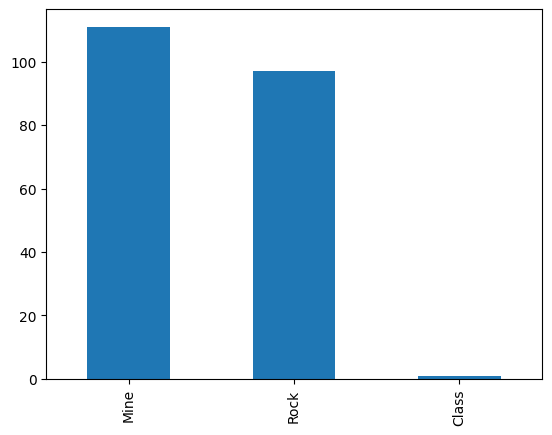

In [ ]:
df[60].value_counts().plot(kind='bar')

# **data preprocessing**

In [ ]:
X=df.drop(columns=60,axis=1)
Y=df[60]

In [ ]:
df[60].value_counts()

Mine     111
Rock      97
Class      1
Name: 60, dtype: int64

In [ ]:
df.groupby(60).max()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
Class,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
Mine,0.1371,0.2339,0.3059,0.4264,0.401,0.277,0.3322,0.459,0.6828,0.7106,...,0.1004,0.0709,0.039,0.0352,0.0447,0.0394,0.0355,0.044,0.0364,0.0439
Rock,0.0856,0.1632,0.1636,0.1732,0.2565,0.3823,0.3729,0.411,0.5598,0.6194,...,0.0426,0.0386,0.0265,0.0271,0.0233,0.0244,0.0316,0.0199,0.0294,0.018


In [ ]:
a=df.drop(columns=60,axis=0)
b=df[60]

In [ ]:
print(X)

              0            1            2            3            4   \
0    attribute_1  attribute_2  attribute_3  attribute_4  attribute_5   
1           0.02       0.0371       0.0428       0.0207       0.0954   
2         0.0453       0.0523       0.0843       0.0689       0.1183   
3         0.0262       0.0582       0.1099       0.1083       0.0974   
4           0.01       0.0171       0.0623       0.0205       0.0205   
..           ...          ...          ...          ...          ...   
204       0.0187       0.0346       0.0168       0.0177       0.0393   
205       0.0323       0.0101       0.0298       0.0564        0.076   
206       0.0522       0.0437        0.018       0.0292       0.0351   
207       0.0303       0.0353        0.049       0.0608       0.0167   
208        0.026       0.0363       0.0136       0.0272       0.0214   

              5            6            7            8             9   ...  \
0    attribute_6  attribute_7  attribute_8  attribute_9  

In [ ]:
print(Y)

0      Class
1       Rock
2       Rock
3       Rock
4       Rock
       ...  
204     Mine
205     Mine
206     Mine
207     Mine
208     Mine
Name: 60, Length: 209, dtype: object


In [ ]:
X_train.shape,y_train.shape,X_test.shape

((146, 60), (146,), (63, 60))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=11256)

In [ ]:
neighbors = np.arange(1,14)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# **KNN**

In [ ]:
irisData = load_iris()
X = irisData.data
y = irisData.target

In [ ]:
for i,k in enumerate(neighbors):
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(X_train, y_train)
 train_accuracy[i] = knn.score(X_train, y_train)
 test_accuracy[i] = knn.score(X_test, y_test)

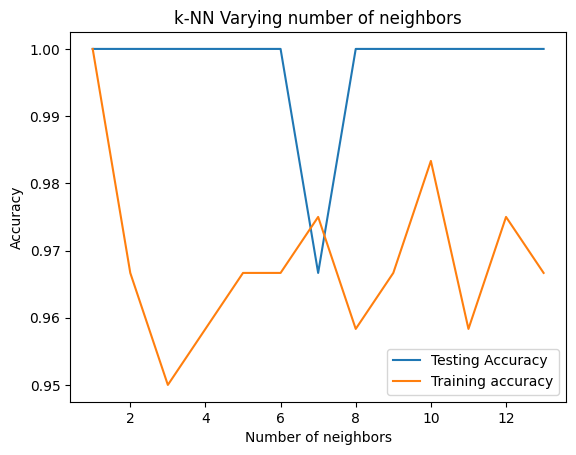

In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(150, 4) (120, 4) (30, 4)


In [ ]:
print(X_train)
print(y_train)

[[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]
 [5.8 2.7 4.1 1. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.5 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  2.  3.5 1. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.7 4.2 1.3]
 [5.1 3.4 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [7.7 3.8 6.7 2.2]
 [4.6 3.2 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 4.2 1.4 0.2]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.  4.5 1.5]
 [6.2 3.4 5.4 2.3]
 [5.5 2.3 4.  1.3]
 [5.4 3.9 1.7 0.4]
 [5.  2.3 3.3 1. ]
 [6.4 2.7 5.3 1.9]
 [5.  3.3 1.4 0.2]
 [5.  3.2 1.

# **Logistic Regression**

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
knn.score(X_test,y_test)

1.0

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,10,0,0,10
1,0,9,0,9
2,0,0,11,11
All,10,9,11,30


In [ ]:
score=model.score(X_test,y_test)
print(score)

1.0


In [ ]:
prediction=model.predict(X_test)

In [ ]:
pd.crosstab(y_test, prediction, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,10,0,0,10
1,0,9,0,9
2,0,0,11,11
All,10,9,11,30
